# Análisis exploratorio de datos para el df final

In [14]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_csv("juguete_final.csv")
df.head()

,total_evaporation_sum,estacion_verano,estacion_otoño,estacion_invierno,estacion_primavera,has_rio,temperat_2m,runoff_sum,volumetric_soil_water_layer_1,precipitation_sum_open_meteo,...,suelo_lagunas,suelo_alfisoles,suelo_inceptisoles,suelo_rio,suelo_salinas,suelo_ultisoles,suelo_vertisoles,suelo_medano,suelo_esteros,inundacion
0,0.0042,1,0,0,0,False,298.5,0.012,0.25,45.2,...,0,0,0,0,0,0,0,0,0,False
1,0.0055,1,0,0,0,False,301.2,0.008,0.18,22.7,...,0,0,0,0,0,0,0,0,0,False
2,0.0018,0,1,0,0,True,288.3,0.045,0.38,156.8,...,0,0,1,0,0,0,0,0,0,True
3,0.0012,0,0,1,0,False,276.8,0.028,0.42,98.4,...,0,1,0,0,0,0,0,0,0,False
4,0.0028,0,0,0,1,True,290.5,0.035,0.35,112.3,...,0,0,0,0,0,0,0,0,0,False


In [16]:
df['temperat_2m'] = (df['temperat_2m'] - 273.15).round(2)
df.head()

,total_evaporation_sum,estacion_verano,estacion_otoño,estacion_invierno,estacion_primavera,has_rio,temperat_2m,runoff_sum,volumetric_soil_water_layer_1,precipitation_sum_open_meteo,...,suelo_lagunas,suelo_alfisoles,suelo_inceptisoles,suelo_rio,suelo_salinas,suelo_ultisoles,suelo_vertisoles,suelo_medano,suelo_esteros,inundacion
0,0.0042,1,0,0,0,False,25.35,0.012,0.25,45.2,...,0,0,0,0,0,0,0,0,0,False
1,0.0055,1,0,0,0,False,28.05,0.008,0.18,22.7,...,0,0,0,0,0,0,0,0,0,False
2,0.0018,0,1,0,0,True,15.15,0.045,0.38,156.8,...,0,0,1,0,0,0,0,0,0,True
3,0.0012,0,0,1,0,False,3.65,0.028,0.42,98.4,...,0,1,0,0,0,0,0,0,0,False
4,0.0028,0,0,0,1,True,17.35,0.035,0.35,112.3,...,0,0,0,0,0,0,0,0,0,False


In [17]:
df_sin_hot = pd.read_csv("juguete_sin_oneHot.csv")
df_sin_hot.head()

,total_evaporation_sum,estacion,has_rio,distancia_rio,temperat_2m,runoff_sum,volumetric_soil_water_layer_1,precipitation_sum_open_meteo,precipitation_d_1,precipitation_d_2,precipitation_d_3,precipitation_d_4,precipitation_d_5,precipitation_d_6,tipo_suelo,inundacion
0,0.0042,Verano,False,8.5,298.5,0.012,0.25,45.2,8.5,12.3,7.1,5.8,6.2,5.3,Molisoles,False
1,0.0055,Verano,False,12.3,301.2,0.008,0.18,22.7,3.2,5.1,4.8,3.6,2.9,3.1,Aridisoles,False
2,0.0018,Otoño,True,0.8,288.3,0.045,0.38,156.8,42.5,38.2,28.6,22.1,15.3,10.1,Inceptisoles,True
3,0.0012,Invierno,False,15.7,276.8,0.028,0.42,98.4,18.3,22.7,19.5,16.2,12.8,8.9,Alfisoles,False
4,0.0028,Primavera,True,2.4,290.5,0.035,0.35,112.3,25.4,28.9,23.5,18.7,10.2,5.6,Entisoles,False


In [18]:
df_sin_hot['temperat_2m'] = (df_sin_hot['temperat_2m'] - 273.15).round(2)
df_sin_hot.head()


,total_evaporation_sum,estacion,has_rio,distancia_rio,temperat_2m,runoff_sum,volumetric_soil_water_layer_1,precipitation_sum_open_meteo,precipitation_d_1,precipitation_d_2,precipitation_d_3,precipitation_d_4,precipitation_d_5,precipitation_d_6,tipo_suelo,inundacion
0,0.0042,Verano,False,8.5,25.35,0.012,0.25,45.2,8.5,12.3,7.1,5.8,6.2,5.3,Molisoles,False
1,0.0055,Verano,False,12.3,28.05,0.008,0.18,22.7,3.2,5.1,4.8,3.6,2.9,3.1,Aridisoles,False
2,0.0018,Otoño,True,0.8,15.15,0.045,0.38,156.8,42.5,38.2,28.6,22.1,15.3,10.1,Inceptisoles,True
3,0.0012,Invierno,False,15.7,3.65,0.028,0.42,98.4,18.3,22.7,19.5,16.2,12.8,8.9,Alfisoles,False
4,0.0028,Primavera,True,2.4,17.35,0.035,0.35,112.3,25.4,28.9,23.5,18.7,10.2,5.6,Entisoles,False


In [19]:
df_sin_hot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   total_evaporation_sum          15 non-null     float64
 1   estacion                       15 non-null     object 
 2   has_rio                        15 non-null     bool   
 3   distancia_rio                  15 non-null     float64
 4   temperat_2m                    15 non-null     float64
 5   runoff_sum                     15 non-null     float64
 6   volumetric_soil_water_layer_1  15 non-null     float64
 7   precipitation_sum_open_meteo   15 non-null     float64
 8   precipitation_d_1              15 non-null     float64
 9   precipitation_d_2              15 non-null     float64
 10  precipitation_d_3              15 non-null     float64
 11  precipitation_d_4              15 non-null     float64
 12  precipitation_d_5              15 non-null     float

C:\Users\Nicolas\AppData\Local\Temp\ipykernel_16720\3862459377.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)
C:\Users\Nicolas\AppData\Local\Temp\ipykernel_16720\3862459377.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)


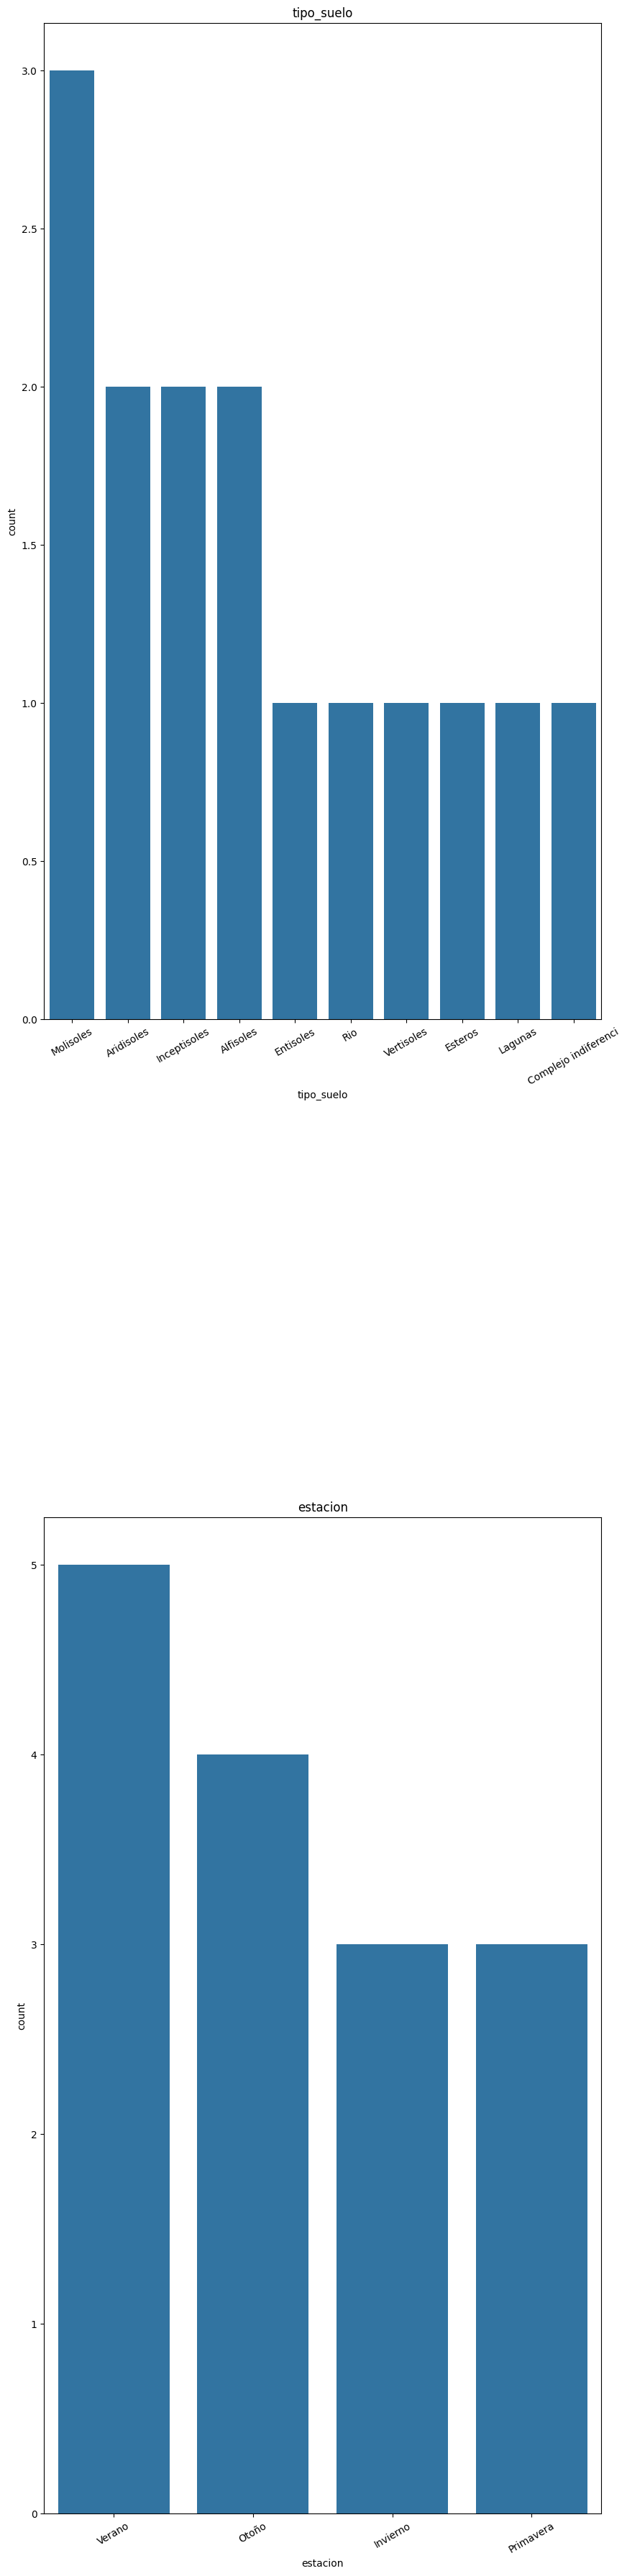

In [20]:
# Tomemos las variables categóricas y generemos gráficos de barras

col_cat = ['tipo_suelo', 'estacion']

# Gráficos de barras de conteo
fig, ax = plt.subplots(nrows=len(col_cat), ncols=1, figsize=(10,45))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(col_cat):
  sns.countplot(x=col, data=df_sin_hot, ax=ax[i])
  ax[i].set_title(col)
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)